# Project: Criminal Relations on Personal Gross Domestic Product #

CS 418 GitHub: [https://github.com/CS418/group-project-data-diver]

### This is a general report for the 3 Hypothesis
_Note that for Hypothesis 1, Hypothesis 2 and 3 separately, please find the direct link as follow:_

**_Hypothesis 1 Notebook:_** https://github.com/CS418/group-project-data-diver/tree/main/Final%20Report%20Notebook/Tri%20Quan%20Do%20Notebook%20(Hypothesis%201) 

**_Hypothesis 2 Notebook:_** https://github.com/CS418/group-project-data-diver/tree/main/Final%20Report%20Notebook/Tuan%20Khang%20Nguyen%20Notebook%20(Hypothesis%203)

**_Hypothesis 3 Notebook:_** https://github.com/CS418/group-project-data-diver/blob/main/Main%20Notebook/Data_Driver_Main_Criminal_Relation_on_GDP.ipynb

----------------------------------------

#### Student Information:

UIC CS 418, Spring 2023 - CC

  + Student 1: Tri Quan Do (tdo22@uic.edu)
  + Student 2: Tuan Khang Nguyen (tnguy272@uic.edu)
  + Student 3: Huy Truong (thuyng2@uic.edu)

**Introduction**:

There are three datasets that are used to anaylized hypothesis which are:
  + Chicago Crimes 2001 - Now ([https://catalog.data.gov/dataset crimes-2001-to-present](**https://catalog.data.gov/dataset/crimes-2001-to-present**)) that provides an information about the crimes in Chicago from 2001 until now. 
  + Moreover, we also use another dataset which is the Chicago GDP from 2001 - Now ([https://fred.stlouisfed.org/series/NGMP16980](**https://fred.stlouisfed.org/series/NGMP16980**)) to point out the corelation between the rate of crimes and GDP.
  + Los Angeles (LA) Criminal Dataset from 2010-2019 ([https://data.lacity.org/Public-Safety/Crime-Data-from-2010-to-2019/63jg-8b9z?fbclid=IwAR2YWF6fI7NLY0Iztk7IMn2MpATGfYrIeLl8vcUtjquxnn9TdghPU252Ngs])

Detail on progress will be given in each milestone below

In [ ]:
# Package installization required
!pip install pandas
!pip install numpy
!pip install -U scikit-learn
!pip install seaborn

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression # Modeling for Machine Learning Task
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV

**_Part 1 - Project introduction:_** _An introduction that discusses in detail the data you are analyzing, and the question or questions you are investigating._

_Answered to Part 1_:

1. Project Big Ideas and Literature Review:

  The rise in crime rates in the US has been a concern for many, as revealed in recent statistics. While property offenses have continued to fall, violent crime rates, which include homicide, assault, robbery, and rape, have increased by about 5% from the previous year. Economic theory posits a positive association between unemployment and property crime, suggesting that rising unemployment rates could be linked to an increase in property crime rates. We aim to investigate whether economic stability is the underlying variable that governs the pattern of crimes.

  Our focus is on Chicago, a city that differs from other major cities as it had experienced an increase in violent crime rates before the outbreak, and the City of Los Angeles for comparison. We aim to identify factors that may contribute to criminal activities and different types of activities. Specifically, we aim to examine the relationship between the proportion of GDP/economic status rate and the criminal scenario in these regions.

  We have formulated three hypotheses that we will investigate in this project. First, we hypothesize that GDP and crime rate are inversely proportional. Second, we hypothesize that the correlation between crime and GDP is stronger in Chicago than in the City of Los Angeles. Lastly, we hypothesize that theft, burglary, and robbery rates correlate most strongly with lower GDP compared to other types of crimes.

  To test these hypotheses, we will be using four datasets. The first dataset is the Chicago Crimes dataset, which covers the period from 2001 to the present. It is downloadable in CSV format and contains more than 1 million rows. The dataset features many attributes but our features of interest are only the primary type of crime, description, location description, and year. The second dataset is the Los Angeles Crimes dataset, which covers the period from 2010 to 2019. It is also downloadable in CSV format and contains more than 1 million rows. The dataset includes many attributes but our features of interest are only the primary type of crime, crime code description, date, and location description, which are all in slightly different format than the Chicago dataset. We chose these datasets because they are open-sourced for educational purposes and are very diverse in sample. 

  The third and fourth datasets are the Chicago Gross Domestic Product and the Los Angeles Gross Domestic Product (GDP) datasets, which both cover the period from 2001 to the present. They are downloadable in CSV format and contain 21 rows each. The datasets feature the year and GDP. We chose these datasets because we believe GDP is representative of a region’s economic maturity, employment opportunities, and, thus, education development.

  Overall, this project aims to examine the relationship between economic factors and crime rates in the US, with a particular focus on Chicago. Through this investigation, we hope to identify factors that contribute to criminal activity, which prospectively opens more revenues for solution research.


2. Related to the hypothesis schema, the team decided to concentrate on and follow to what has been aforementioned and authorized from Professor and the TA from the previous milestone. Below is the 3 hypothesises have been proposed:

  1. GDP is inversely proportional to crime rate

  2. The correlation between crime and GDP is larger in Chicago than in the City of Los Angeles.

  3. Rate of theft, burglary, and robbery correlate with lower GDP the most with regards to other types of crimes. 

  **Research Question for Hypothesis 1:** 

  Is there a statistically significant inverse relationship between a country's GDP and its crime rate?

  **Research Question for Hypothesis 2:**

  What is the correlation of lower GDP to rate of theft burgalry, and robbery?

  **Research Question for Hypothesis 3:**

  To what extent does the rate of theft, burglary, and robbery correlate with lower GDP as compared to other types of crimes in developed and developing countries?

  **Abstract:** This study explores the relationship between a country's GDP and its crime rate. The research question asks whether there is a significant inverse correlation between these two variables. By analyzing data from various countries and using appropriate statistical methods, the study aims to provide insights into the potential impact of economic factors on crime rates.


------------------


**_Part 2 - Data Cleaning Procedure:_** _Show clearly how you cleaned your data, step by step. Show the original data size and the final size._


_Answered to Part 2_:

1. _**Chicago Crimninal Dataset:**_

  Direct link to Chicago Criminal Data (2001-present): [https://catalog.data.gov/dataset/crimes-2001-to-present]

  The dataset provided includes records of reported crimes (excluding murders where data is available for each victim) that took place in Chicago between 2001 and the present, with the most recent seven days of data being excluded. The data is sourced from the CLEAR (Citizen Law Enforcement Analysis and Reporting) system of the Chicago Police Department. To ensure the privacy of crime victims, addresses are only shown at the block level, and exact locations are not disclosed.

  **Original size: 1.70 GB (1,833,457,927 bytes)**

  For the Chicago dataset, the original size is 1.70 GB. We start by dropping columns that are not of interest and removing rows with NaN values, which account for 0.13% of the data and are mostly found in the 'Location Description' column. After cleaning, we split the dataset into chunks of yearly periods and get 7 sub-datasets with sizes of about 50 MB each.

  In the Hypothesis 1 approach specifically, since the original data is large that it is not possible to upload to Google Collab Virtual Environment as error detected is "ParserError: Error tokenizing data. C error: EOF inside string starting at row 4920076". Furthermore, time complexity is high for uploading successfully the file that could take more than 1 hours for finishing the upload. However, it is easy to cause the virtual machine to crash due the overloading. Therefore, I came up with a strategy that split the original data into multiple small tables as:

  1. file_01_05 = "Chicago_Crimes_2001_to_2005.csv"
  2. file_06_10 = "Chicago_Crimes_2006_to_2010.csv"
  3. file_11_15 = "Chicago_Crimes_2011_to_2015.csv"
  4. file_16_17 = "Chicago_Crimes_2016.csv"
  5. file_17_18 = "Chicago_Crimes_2017.csv"
  6. file_18_19 = "Chicago_Crimes_2018_to_2019.csv"
  7. file_20_22 = "Chicago_Crimes_2020_to_2022.csv"

  **Size of each data file after complexity deduction:**

  1. file_01_05: 4.96 MB (5,205,742 bytes)
  2. file_06_10: 64.0 KB (65,536 bytes)
  3. file_11_15: 28.7 MB (30,142,464 bytes)
  4. file_16_17: 54.9 MB (57,577,472 bytes)
  5. file_17_18: 54.5 MB (57,221,120 bytes)
  6. file_18_19: 74.4 MB (78,020,970 bytes)
  7. file_20_22: 2.14 MB (2,245,409 bytes)

  Therefore, it takes less than 5 minutes for uploading the whole files and avoiding crashing since the size has been optimized.

  **Data lost: 0**. Since excel has the filter option, I just filter by year and move row corresponding to the fitered year to another table and save under another name. Hence, no data lost has been detected that Sum of rows from break-down file = orignal data file.

  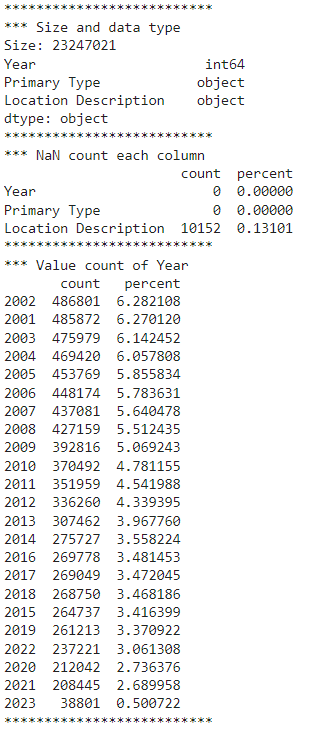

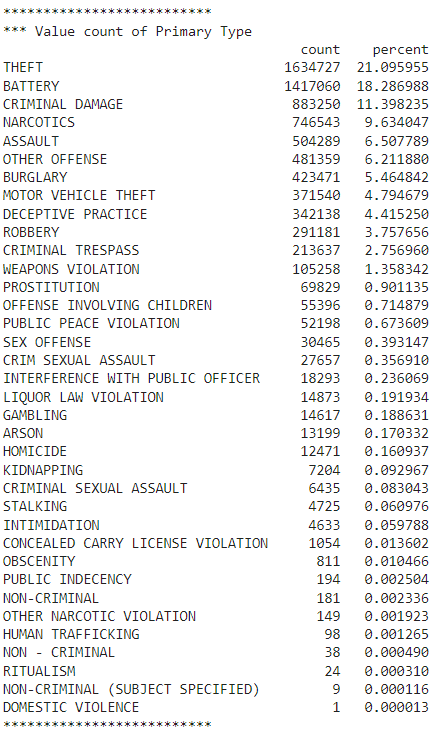


2. _**Chicago/Los Angeles GDP Record Dataset**_

  Direct link to Chicago GDP (2001-present): [(https://fred.stlouisfed.org/series/NGMP16980)]

  Gross domestic product (GDP) by metropolitan area, which is the measure of the market value of all final goods and services produced within a metropolitan area in a particular period of time.

  **Original size: 8.00 KB (8,192 bytes)**

  The GDP datasets are small and straightforward, so there is not much to be done.

3. _**Los Angeles Criminal Dataset**_

  For the Los Angeles dataset, the original size is 166 MB. We found that the column format is different from the Chicago data file, with unintuitive column names such as 'Crm Cd Desc' and 'Premis Desc.' Therefore, we analyze and translate column names to make the format consistent. We keep only columns with names of interest and remove rows with NaN values (0.05% of data and are in location description). After cleaning, the final size of the Los Angeles dataset is 36 MB.

  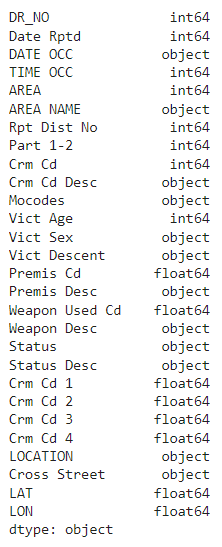


**_How the data connected:_** 

Represent the trend under visualization of crime rate vs gdp and compared by year

We do not need to remove any outliers or scale the data as it is nominal data. We merge the GDP data with the crime data based on the year column to have a cross-product of GDP and Crime data in both Chicago and Los Angeles. The GDP datasets are small and straightforward, so there is not much to be done.

In summary, we clean the data by dropping irrelevant columns, removing rows with NaN values, and selecting only the relevant features for our analysis. We also merge datasets based on the year column for efficient querying. After cleaning, the final size of the Chicago dataset is about 7 x 50 MB, the final size of the Los Angeles dataset is 36 MB, and the final size of the GDP data for both cities is 21 rows respectively. We did not need to remove any outliers or scale the data. We lost approximately 79% of data from the original Chicago dataset and 78% of data from the original Los Angeles dataset after cleaning. The losses significantly come from dropping columns and insignificantly come from dropping Nan values.


------------------

**Part 3 - Exploratory data analysis**
_Please observe data visualization as below_

1. Tuan Khang Nguyen Notebook (Explore Data Table LA and Chicago GDP):
https://github.com/CS418/group-project-data-diver/blob/main/Progress_Report_Tuan_Nguyen.ipynb

2. Tri Quan Do (Explore Data Table for Chicago Crime 2001-2022)
https://github.com/CS418/group-project-data-diver/blob/main/Main%20Notebook/Tri%20Quan%20Do%20NoteBook/Tri_Quan_Do_Hypothesis_1..ipynb

3. Huy Truong (Explore Data Table for Chicago and LA Crime)
https://github.com/CS418/group-project-data-diver/blob/main/Main%20Notebook/Data_Driver_Main_Criminal_Relation_on_GDP.ipynb

In the preliminary examination, ưe visualized the GDP data of the Chicago and Los Angeles cities by line-plotting them by year. We observe that while both cities share the same increasing trend. The city of Los Angeles has a much higher GDP than the city of Chicago overall. 

![Chicago and LA GDP Overtime](https://drive.google.com/uc?id=1S-VS2bTGFB1eRAWVhexTqp88924dSjtj)


We visualize the crime make-up percentage for Chicago and observe that some crimes are particularly high in percentage, such as theft, burglary, and robbery. Due to this, we decide to raise the third hypothesis that these 3 crimes have higher correlation with GDP than other types. To start off, we plot the overall crime count and these 3 type-specific counts. We observe a similar decreasing trend for all of them which indicates that crimes are being recorded less over the years. To focus on more finegrain factors or sub-trend, we detrend the data by taking each crime type's percentage out of total crime per year. Plotting this percent rate shows more irregular trends.

![Chicago Crime Rate](https://drive.google.com/uc?id=1dkqa532g8NFfhvUTFT2Clp41N5LRT5zO)

![Alt text](https://drive.google.com/uc?id=1Y3n0vb3_cxIe1V12d0n1Ux-Ypcg2LbVv)

![Chicago Crime Factor](https://drive.google.com/uc?id=1VHGXY_zjE6YGi5_QdevtPKSVU7sSmjEj)

On the similar approach on comparing between Chicago and Los Angeles status, we examine crime make-up percentage for LA and observe that some crimes are particularly high in percentage, such as theft, burglary, and robbery. 

![Los Angeles Crime Rate](https://drive.google.com/uc?id=1-hHx0Gvil-KvLGpxqO-6dU0B2HQ9ajKZ)


Further detail on data visualization could be found in separate Jupyter Notebook aforementioned at the head of this report.

**Part 4 - Data:** _Please upload your cleaned data to the repo and a reference to the original data as well as the scripts you used to clean it._

Status: Completed

**Part 5 - Machine Learning Task/ Statistical Analysis:** _Use at least **N** machine learning or statistical analysis techniques to analyze your data, explain what you did (talk about any data preparation needed before applying the ML method.), and talk about the inferences you uncovered. Use the techniques you learned to warranty the reproducibility of your results, such as cross-validation, seeding, etc._

1. **Classification Techniques**:

  _Model Chosen:_ Decision Tree Classification Approach, Gradient Boosting Algorithm, Random Forest

  > **1.1. Decision Tree:** We first create a dataset with independent variables (features) such as GDP, and a dependent variable (target) such as crime rates. Split the data into training and testing sets.

 *Benefits*:

  + Interpretability: Decision trees are easy to understand and interpret, as they provide a clear, hierarchical structure that can be visualized.

  + Handling of mixed data types: Decision trees can handle both continuous and categorical data, making them suitable for a variety of problems.

  + Non-parametric: Decision trees don't require assumptions about the underlying distribution of data, unlike many other statistical models.

 *Drawbacks:* 

  + Overfitting: Decision trees can easily overfit the data, leading to poor generalization performance. Techniques such as pruning or using ensemble methods like random forests can help address this issue.

  + Sensitivity to small changes: Decision trees can be sensitive to small variations in the data, resulting in significantly different tree structures. This can be mitigated by using ensemble methods or cross-validation.

  + Inability to model complex relationships: Decision trees can struggle to model complex relationships between variables, especially if those relationships are not easily represented by a hierarchical structure.

  + Suboptimal splits: Decision tree algorithms often use greedy methods for splitting, which can lead to suboptimal trees. However, this issue can be addressed using more advanced algorithms or ensemble methods.

  **(++) Result:**
  ![Chicago Decision Tree Result](https://drive.google.com/uc?id=10uZszf6RIzPqvApasJiIdWunKPXTryJE)

  ![Chicago Decision Tree MSE](https://drive.google.com/uc?id=1IOe1LnNJHWE0AEXij9oEKeF2pngzkEh6)

  > **1.2. Random Forest:** To use Random Forest for finding the correlation between crime rate and GDP, you can train a regression model using the crime rate as the target variable and GDP as the input feature. Random Forest can help to identify the nonlinear and complex relationships between the input and output variables, and can handle a large number of input features.

  *Advantages:* 

  + Random Forest can handle both numerical and categorical input features.
  
  + Random Forest can capture nonlinear and complex relationships between the input and output variables, making it useful for finding correlations between crime rate and GDP.
  
  + Random Forest can provide feature importance scores that can help to identify the most important input features for predicting crime rate.
  
  + Random Forest can be less prone to overfitting than other machine learning algorithms, as it combines the predictions of multiple decision trees.
  
  *Disadvantages:*

  + Random Forest can be computationally expensive and may require significant computational resources to train and tune the model.
  
  + Random Forest can be difficult to interpret, as it combines the predictions of multiple decision trees.
  
  + Random Forest may not work well if the input features are highly correlated or if there are irrelevant input features in the dataset.
  
  + Random Forest may not work well if there are imbalanced classes in the target variable, as this can lead to biased predictions.

  **(++) Result:**
  
  ![Chicago Random Forest](https://drive.google.com/uc?id=141SZB30hmEddnYeN-jGURaaLhbx6w0XG)

  > **1.3. Gradient Boosting Algorithm:**
  We train a regression model using the crime rate as the target variable and GDP as the input feature. You can then use the model to make predictions about the crime rate based on changes in GDP. GBM can help to identify the nonlinear and complex relationships between the input and output variables, and can handle a large number of input features.

  Benefits:

  + GBM can handle large and complex datasets with many input features, making it suitable for this problem.

  + GBM can handle both numerical and categorical input features.

  + GBM can capture nonlinear and complex relationships between the input and output variables, making it useful for finding correlations between crime rate and GDP.

  + GBM can provide feature importance scores that can help to identify the most important input features for predicting crime rate.

  Drawbacks:

  + GBM can be computationally expensive and may require significant computational resources to train and tune the model.

  + GBM is sensitive to overfitting and may not generalize well to new data if the model is overfit to the training data.

  + GBM can be difficult to tune due to the large number of hyperparameters that must be optimized, such as the number of trees, the learning rate, and the depth of the trees.

  + GBM can be sensitive to outliers and missing data, which may need to be handled before training the model.

  **(++) Result:**

  Chicago Analysis:

  ![Chicago Boosting Analysis](https://drive.google.com/uc?id=1-pa6z9mTjl_O5fjwiHaZrFZjNvLc8Zdj)

  LA Analysis:

  ![LA Boosting Result](https://drive.google.com/uc?id=1iokdvj6bVHeQipW43KSxjnJz1HLT6OAQ)

  _ Chicago Dataset: The correlation matrix shows that there is a strong negative correlation (-0.978) between GDP and the burglary rate, a moderate negative correlation (-0.289) between GDP and the robbery rate, and a strong positive correlation (0.949) between GDP and the theft rate. These results suggest that as GDP increases, the burglary rate tends to decrease, while the theft rate tends to increase. The correlation between GDP and the robbery rate is not as strong, suggesting that other factors may play a larger role in determining the incidence of robbery.

  _ Los Angles: The correlation matrix for LA shows that there is a very weak positive correlation (0.007) between GDP and the count of crimes. This suggests that the GDP of LA is not a strong predictor of crime rates in the city. Other factors, such as social and economic conditions, demographics, and public policy may have a larger impact on crime rates in LA.

  ==> The correlation between crime and GDP is larger in Chicago than in the City of City of Los Angeles.


2. **Clustering Techniques**:

  _Model Chosen:_ K-Nearest Neighbors(KNN), K_Means and Mean Shift Clustering

  > **2.1.  KNN: K-Nearest Neighbors:**
I would use this model to predict the criminal rate of Chicago and LA responding to GDP from 2010-2019. These are some benefits and disadvantages for using this model:

  Benefits:

  + KNN can work well when the relationship between the criminal stats and GDP, variables is nonlinear or there are complex interactions between the features.

  + KNN is a non-parametric algorithm, which means it does not make any assumptions about the distribution of the data, making it robust to outliers and skewed data.

  + KNN is easy to understand and implement, making it a good choice for simple problems and as a baseline for comparison against other more complex algorithms.

  Drawbacks:

  + KNN can be computationally expensive, especially for large datasets, because it requires calculating the distance between each observation in the training set and the new observation to be predicted.

  + KNN may not work well in high-dimensional spaces, where the distance between the nearest neighbors may become less informative as the number of dimensions increases.

  + The choice of k and the distance metric can have a significant impact on the performance of the algorithm, and these hyperparameters must be carefully tuned to achieve good results.

  + KNN can suffer from the curse of dimensionality, where the amount of data required to maintain a constant level of accuracy grows exponentially as the number of dimensions increases.

  + KNN is sensitive to the scale of the input features, and it is often necessary to normalize or standardize the data before using KNN to ensure that all features are on the same scale.

  **(++) Results:**

  Chicago KNN Result Analysis:

  ![Chicago KNN Result](https://drive.google.com/uc?id=1EHeMtxieJaSFy6mL5z7FHclT-_9XBoli)

  LA KNN Result Analysis:
  
  ![LA KNN Result](https://drive.google.com/uc?id=16ujoGtI0dw8GJkztSX3fAjZJJVSz9uoM)

  > **2.2. K_Means Clustering:** can be used to explore patterns or groupings in the data.

  Benefits:

  + Simplicity: K-means is easy to understand and implement, making it suitable for beginners and quick analyses.

  + Scalability: K-means can handle large datasets relatively well, especially when using efficient algorithms like the Elkan or MiniBatch K-means variants.

  + Unsupervised learning: K-means is an unsupervised learning algorithm that can help discover hidden patterns or groupings in the data without the need for labeled data.

  Visualization: K-means can be used for dimensionality reduction and visualization, which can provide insights into the data structure and relationships between variables.

  Drawbacks:

  + Assumes spherical clusters: K-means assumes that the clusters are spherical and equally sized, which may not always be the case in real-world data.

  + Initial centroid selection: The algorithm's performance depends on the initial choice of cluster centroids, which can lead to different results with different initializations. This issue can be mitigated using techniques like K-means++ for better centroid initialization.

  + Choosing the number of clusters: Selecting the optimal number of clusters (k) can be challenging and often requires experimentation or using methods like the elbow method or silhouette analysis.

  + Limited applicability: K-means is not directly applicable to the problem of analyzing the relationship between crime rates and GDP over the years, as it is a clustering algorithm, not a regression or trend analysis tool.

  + Sensitive to feature scaling: Like KNN, K-means is sensitive to the scale of features, requiring normalization or standardization to ensure that all features have equal importance.

  **(++) Results:**

  Chicago K_Means Analysis

  ![Chicago KMeans](https://drive.google.com/uc?id=1EMnaW3UrAE97vw-wphVGU-k5sph6BDtn)

  Los Angeles K_Means Analysis
  
  ![LA KMeans](https://drive.google.com/uc?id=1mqwUB5AXjeb-XYXsB3hB2UQt8k821BDU)

  > **2.3. Mean Shift Clustering:** can help explore the structure of the data.

  Benefits:

  + Non-parametric: Mean-shift is a non-parametric algorithm, meaning it makes no assumptions about the underlying data distribution. This can be advantageous when the data does not follow a specific distribution.

  + Automatic cluster detection: Mean-shift can automatically determine the number of clusters based on the data density, unlike K-means, which requires specifying the number of clusters (k) beforehand.

  + Robust to outliers: Mean-shift is relatively robust to outliers, as it is based on the underlying data density.

  + Handles arbitrary cluster shapes: Mean-shift can handle clusters of different shapes and sizes, unlike K-means, which assumes spherical clusters.

  Drawbacks:

  + Computational complexity: Mean-shift has a higher computational cost compared to K-means, as it iteratively shifts data points towards the densest regions. This can be a significant issue for large datasets.

  + Bandwidth parameter selection: Choosing the right bandwidth parameter is crucial for the algorithm's performance. A small bandwidth may result in too many clusters, while a large bandwidth may merge distinct clusters. This selection often requires experimentation or cross-validation.

  + Limited applicability: Mean-shift, like K-means, is not directly applicable to the problem of analyzing the relationship between crime rates and GDP over the years, as it is a clustering algorithm, not a regression or trend analysis tool.

  + Sensitive to feature scaling: Similar to KNN and K-means, Mean-shift is sensitive to the scale of features, requiring normalization or standardization to ensure that all features have equal importance.

  **(++) Results**:

  Chicago Analysis

  ![Chicago Mean Shift Result](https://drive.google.com/uc?id=1ZdBZPfNsU75vzeeLdYw6sQa4fPCasS3h)

  Los Angeles Analysis

  ![LA Mean Shift Result](https://drive.google.com/uc?id=1AT_cm9Nnp4nRmcMd-YqYja2avdLbEz5S)

3. **Correlation Analysis (Statistical Techniques)**:

  _Model Chosen:_ Linear Regression,  Pearson correlation and Kendall correlation

  > **3.1. Linear Regression:**

  Benefits:

  + It captures linear relationships between variables, i.e. how one variable affects another in a linear manner.
  + It can be used for predicting values of one variable based on the values of another variable.
  + It provides coefficients for each input feature, which can be easily interpreted as the amount of change in the output variable for a unit change in the corresponding input feature.

  Drawbacks:

  + It assumes a linear relationship between variables, so it cannot capture non-linear relationships.
  + It is sensitive to outliers just like Pearson due to the slope calculation.

  > **3.2. Pearson Correlation:**

  Benefits:

  + It captures the linear relationship between two variables.
  + It produces coefficients between -1 and 1, where -1 indicates max negative correlation, 0 indicates no correlation, and 1 indicates max positive correlation. This makes it interpretable and easy to understand the strength and direction of the relationship between two variables.
  + Coefficients are extremely easy to be calculated for a large number of data points, making it scalable for big datasets.

  Drawbacks:
  + It only captures linear relationships between variables and cannot capture nonlinear ones.
  + It calculates means and standard deviations so it is sensitive to outliers.

  > **3.3 Kendall Correlation:**

  Benefits:

  + It can capture monotonic relationships between variables, which means it can capture non-linear relationships that Pearson cannot.
  + It is less sensitive to outliers compared to Pearson, as it is based on the ranks of the data rather than the actual values.
  + It does not make any assumptions about the distribution of data, making it more suitable for non-normal or non-linear data than Pearson.

  Drawbacks:

  + It may not be as sensitive to linear relationships as Pearson. If the relationship between variables is truly linear, Kendall correlation is less efficient and may not provide accurate results.
  + It involves comparing all pairs of data points, which is computationally expensive for large datasets.
  + It does not provide a simple interpretation like Pearson, as it is based on ranks.



**Group Conclusion:**

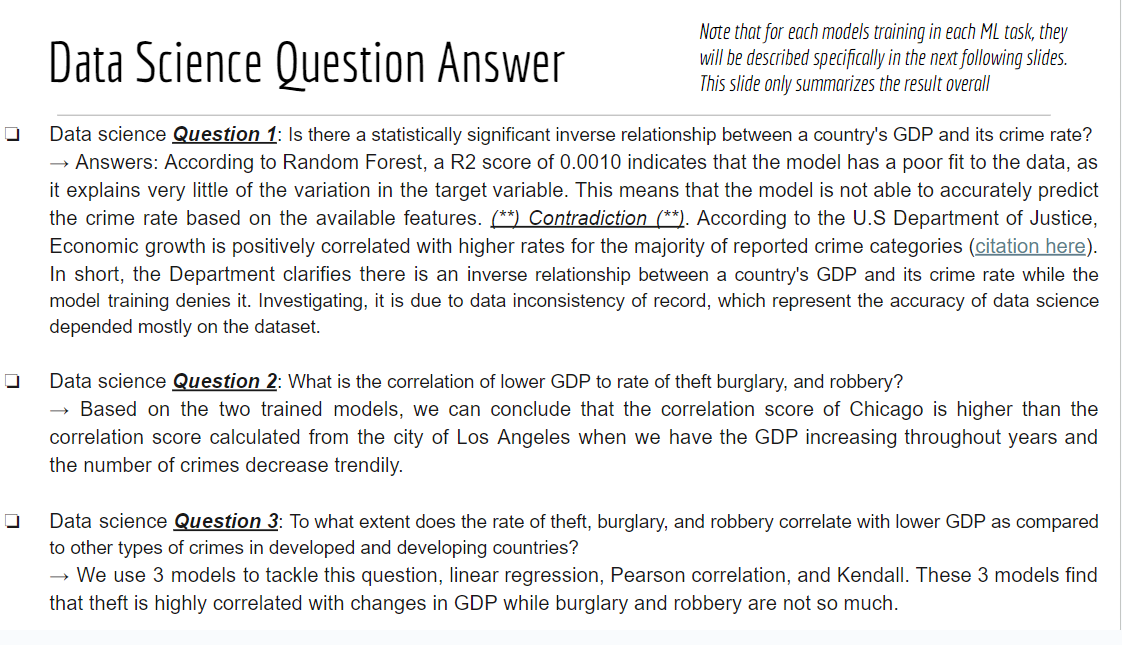

**Reflection: a discussion of the following:**

1. What is the hardest part of the project that you’ve encountered so far?

  1.1. The most challenging is cleaning data and find a more efficienct data or checking the error existed with affect to the accuracy. Note that since the data is large, it is hard to generate unit_test case for a 100% accurate. Processing a lot of data can be memory-intensive, which can cause performance problems or even system crashes if there isn't enough memory accessible. As having mentioned before that I had to split to multiple table manually and the process required weeks to complete.

  1.2. Another challenging is that the criminal data report is not consistency, in which the criminal record in year 2004, 2005 is significantly different from 2001. For example, there were 7 record for 2004 while more than 10,000 records in 2001; which means some information had been implicitly hidden or the data does not support full record in a year, which reduce the accuracy the conclusion

2. What are your initial insights?

  For the first problem on data complexity, I completed the manual splitting to be able to upload files to virtual environment. However, when studying Data Mining in 483, I have known that PySpark or Hadoop virtual environment could support for large data with high performance of $O(log N)$, I may try to search on that approach

  For the second problem, I need to find data for each year with number record is approximately or not significantly different. In case no databases support, I may come up with grouping by year-period instead of specifying each year


3. Are there any concrete results you can show at this point? If not, why not?

  Yes. I have shown the significant different among data record. The reason I am postponing the model training is that I need more time to find consistent data; otherwise, I may come up with Professor for advise or change location (instead of concentrate on Chicago, I could change to New York or Wisconsin...) which contain for database record in an appropriate consistency


4. Going forward, what are the current biggest problems you’re facing?

  Finding and verifying if data is appropriate before training models.
  That is the biggest task I need to figured out ASAP

5. Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?

  Yes, I am on track with the project as models formula has been found and it is not hard to apply the models if the data has been clean and extracted to the dataFrame. There is **one** challenge is finding and verifying if data is appropriate before training models.
  That is the biggest task I need to figured out ASAP


6. Given your initial exploration of the data, is it worth proceeding with your project, and why? 

  Currently, the data could not be trained with models due to the accuracy (please view the figure at the end of the report for more detail due to the inconsistent record from the source)


7. If not, how are you going to change your project and why do you think it’s better than your current results?

  Currently, I am not thinking about changing the project. If yes, the only thing need to be changed is the data files instead of the project idea.The investigation of the intricate and diverse correlation between GDP and crime is crucial to comprehending the impact of economic factors on crime. Through such research, we can gain insights into how fluctuations in economic conditions influence crime rates and how various economic variables contribute to the occurrence of distinct categories of criminal activities. Furthermore, it is imperative to recognize that the connection between GDP and crime is intimately linked to social inequality. Studies have demonstrated that individuals hailing from underprivileged socioeconomic backgrounds are more susceptible to engaging in criminal conduct. Therefore, delving into this relationship can assist in identifying regions where social inequality is particularly prominent and in devising targeted interventions aimed at curbing criminal activities while promoting social mobility.

-----------------------------------

**References:** 

1. World Bank. (n.d.). GDP (current US$) - United States. Retrieved February 27, 2023, from
 https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?locations=US

2. City of Chicago. (n.d.). Crimes - 2001 to Present. Data.gov. Retrieved February 27, 2023, from 
https://catalog.data.gov/dataset/crimes-2001-to-present

3. U.S. Department of Justice. (2021). Crime Data from 2020 to Present. Data.gov. Retrieved February 27, 2023, from 
https://catalog.data.gov/dataset/crime-data-from-2020-to-present

4. Beck, A. (2020, July). Exploring the Link Between Economics and Crime: A Complex Picture [White paper]. CAP Index. 
https://capindex.com/wp-content/uploads/2020/07/Exploring-the-Link-Between-Economics-and-Crime-A-Complex-Picture-A-paper-by-Professor-Adrian-Beck-with-CAP-Index-July-2020_f.pdf

5. NPR. (2022, October 27). U.S. Crime Data Could Shape Midterm Elections. NPR. 
https://www.npr.org/2022/10/27/1131825858/us-crime-data-midterm-elections


6. NPR. (2021, September 27). FBI Data Show Surge In Murders In 2020. NPR. 
  
  https://www.npr.org/2021/09/27/1040904770/fbi-data-murder-increase-2020


7. World Bank. (n.d.). GDP (current US$). Retrieved February 27, 2023, from 

  https://data.worldbank.org/indicator/NY.GDP.MKTP.CD

8. Kristiansen, Søren L. “Nearest Neighbors with Keras and Coreml.” Medium, Medium, 20 May 2019, https://medium.com/@sorenlind/nearest-neighbors-with-keras-and-coreml-755e76fedf36. 

9. Goyal, Anant. “Logistic Regression with Keras.” MarkTechPost, 9 Apr. 2021, https://www.marktechpost.com/2021/04/08/logistic-regression-with-keras/. 

10. Masui, Tomonori. “All You Need to Know about Gradient Boosting Algorithm − Part 1. Regression.” Medium, Towards Data Science, 12 Feb. 2022, https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-1-regression-2520a34a502.

### Important: 

For visiting implementation in detail, please visit model training and code execution at 3 JupyterNotebook as follow:

**_Hypothesis 1 Notebook:_** https://github.com/CS418/group-project-data-diver/tree/main/Final%20Report%20Notebook/Tri%20Quan%20Do%20Notebook%20(Hypothesis%201) 

**_Hypothesis 2 Notebook:_** https://github.com/CS418/group-project-data-diver/tree/main/Final%20Report%20Notebook/Tuan%20Khang%20Nguyen%20Notebook%20(Hypothesis%203)

**_Hypothesis 3 Notebook:_** https://github.com/CS418/group-project-data-diver/blob/main/Main%20Notebook/Data_Driver_Main_Criminal_Relation_on_GDP.ipynb